# Problem $1$

Compare the classification performance of linear regression and k-nearest neighbor classification on the $\texttt{zipcode}$ data. In particular, consider only the $2$’s and $3$’s, and $k=1,3, 5, 7,$ and $15$. Write your own function for the $k$-nearest neighbor classification. Show both the training and test error for each choice of $k$. The $\texttt{zipcode}$ data are available from the book website: \url{https://hastie.su.domains/ElemStatLearn/data.html}

## My own $k$-Nearest Neighbor function

### Two auxilliary functions: $\texttt{L2}\_\texttt{distance()}$ and $\texttt{nearest}\_\texttt{nb()}$:

In [1]:
#find L2 distance between two vectors v and u
L2distance = function(v,u){
  if (length(v) != length(u)){
    stop('Vectors are be of the different length')
  }
  else{
    return(sum(abs(u-v)))
  }
}

#find k nearest points neighbours from inp among x[1],...,x[n]
nearest_nb = function(x, inp, k, d=L2distance){
  if(ncol(x) != length(inp)){
    stop('Data have different number of variables')
  }
  dist = 1:nrow(x)
  for(i in 1:nrow(x)){
    dist[i] = d(x[i,],inp)
  }
  dist.sort = sort(dist)
  closest_k = dist.sort[1:k]
  knearest_ind = which(dist %in% closest_k)
  return(knearest_ind)
}

### Finally defining the function

In [2]:
#self-defined knn function
knn_own = function(trainX, testX, trainY, k){
  all_pred = c()
  for(i in 1:nrow(testX)){
    nbs = nearest_nb(trainX, testX[i,], k)
    prediction = mean(trainY[nbs])
    all_pred[i] = round(prediction,0)
  }
  return(all_pred)
}

## Loading Data
We start by loading training data. Look at the columns which correspond only to $2$ or $3$ --- these are the features. We extract out the $3$'s which is the output we want:

In [3]:
X <- as.matrix(read.table(gzfile("/Users/nm/Documents/GitHub/Data Mining/Assign1/zip.train.gz")))
y2or3 <- which(X[, 1] == 2 | X[, 1] == 3)
train.X <- X[y2or3, -1]
train.Y <- X[y2or3, 1] == 3

We do the same thing as above for test data:

In [4]:
X <- as.matrix(read.table(gzfile("/Users/nm/Documents/GitHub/Data Mining/Assign1/zip.test.gz")))
y2or3 <- which(X[, 1] == 2 | X[, 1] == 3)
test.X <- X[y2or3, -1]
test.Y <- X[y2or3, 1] == 3

## Linear Regression
Next we fit a linear model based on the training data $(X,Y)$:

In [5]:
lr.fit <- lm(train.Y ~ train.X)

Now that we have a model, we look at predictions that the model makes when the input features are taken from testing data and training data. This will be a number between $0$ and $1$, but since we are dealing with classification, we round it off to the nearest integer.

In [6]:
prediction_test <- round(cbind(1, test.X) %*% lr.fit$coef,0)
prediction_train <- round(cbind(1, train.X) %*% lr.fit$coef,0)

Obtain the errors for linear regression for testing data and training data:

In [7]:
errortest.lr <- mean(prediction_test != test.Y)*100
errortrain.lr <- mean(prediction_train != train.Y)*100

## $k$-Nearest Neighbours
We want to run $k$NN for $k\in\{1,2,\cdots,20\}$.

In [8]:
k <- 1:50

First we start with the inbuilt $k$NN. We basically do the same as linear regression - fir the model based on training data, test it on the test data and train data to get the testing error and training error respectively.

In [9]:
library(class)
errortest.knn <- numeric(length(k))
errortrain.knn <- numeric(length(k))
for (i in 1:length(k)) {
    prediction_test <- knn(train.X, test.X, train.Y, k[i])
    prediction_train <- knn(train.X, train.X, train.Y, k[i])
    errortest.knn[i] <- mean(prediction_test != test.Y)*100
    errortrain.knn[i] <- mean(prediction_train != train.Y)*100
}

Next we execute the $k$NN function that I wrote (including error calculation).

In [10]:
errortest.knn_own <- numeric(length(k))
errortrain.knn_own <- numeric(length(k))
for (i in 1:length(k)){
    prediction_test <- knn_own(train.X, test.X, train.Y, k[i])
    prediction_train <- knn_own(train.X, train.X, train.Y, k[i])
    errortest.knn_own[i] <- mean(prediction_test != test.Y)*100
    errortrain.knn_own[i] <- mean(prediction_train != train.Y)*100
}

## Tabulating
Now that we have found the errors, we construct a table and print it:

In [11]:
error <- matrix(c(errortest.lr, errortest.knn, errortest.knn_own, errortrain.lr, errortrain.knn, errortrain.knn_own), ncol = 2)
colnames(error) <- c("Test Error(%)", "Train Error(%)")
rownames(error) <- c("Linear Regression", paste("inbuilt k-NN with k =", k), paste("own k-NN with k =", k))
print(error)

                         Test Error(%) Train Error(%)
Linear Regression             4.120879      0.5759539
inbuilt k-NN with k = 1       2.472527      0.0000000
inbuilt k-NN with k = 2       2.472527      0.5759539
inbuilt k-NN with k = 3       3.021978      0.5039597
inbuilt k-NN with k = 4       3.021978      0.6479482
inbuilt k-NN with k = 5       3.021978      0.5759539
inbuilt k-NN with k = 6       3.571429      0.7199424
inbuilt k-NN with k = 7       3.296703      0.6479482
inbuilt k-NN with k = 8       3.571429      0.7919366
inbuilt k-NN with k = 9       3.571429      0.9359251
inbuilt k-NN with k = 10      3.571429      0.7919366
inbuilt k-NN with k = 11      3.571429      0.8639309
inbuilt k-NN with k = 12      3.846154      0.7919366
inbuilt k-NN with k = 13      3.846154      0.8639309
inbuilt k-NN with k = 14      3.846154      0.9359251
inbuilt k-NN with k = 15      3.846154      0.9359251
inbuilt k-NN with k = 16      3.571429      1.0079194
inbuilt k-NN with k = 17    

## Plotting
I also plotted the errors for my $k$NN function, the inbuilt $k$NN function and the linear regression.

Here's the plot for the testing error:

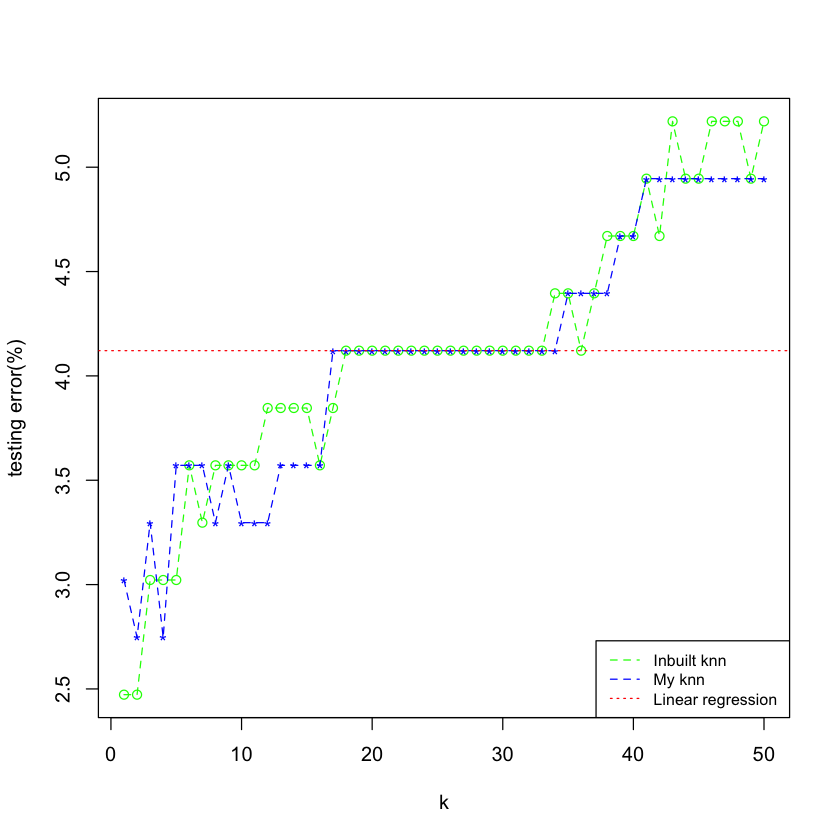

In [12]:
y.limit = c(min(c(errortest.knn_own, errortest.knn, errortest.lr)), max(c(errortest.knn_own, errortest.knn,errortest.lr)))
plot(k,errortest.knn, type='o', lty = 2, ylim=y.limit, col="green", ylab="testing error(%)")
points(k, errortest.knn_own, type="o", lty=2, pch = "*", col="blue")
abline(h = errortest.lr, col="red", lty = 3)
legend("bottomright", legend=c("Inbuilt knn", "My knn", "Linear regression"), col=c("green", "blue","red"), lty=c(2,2,3), cex=0.8)

And here's the plot for the training error:

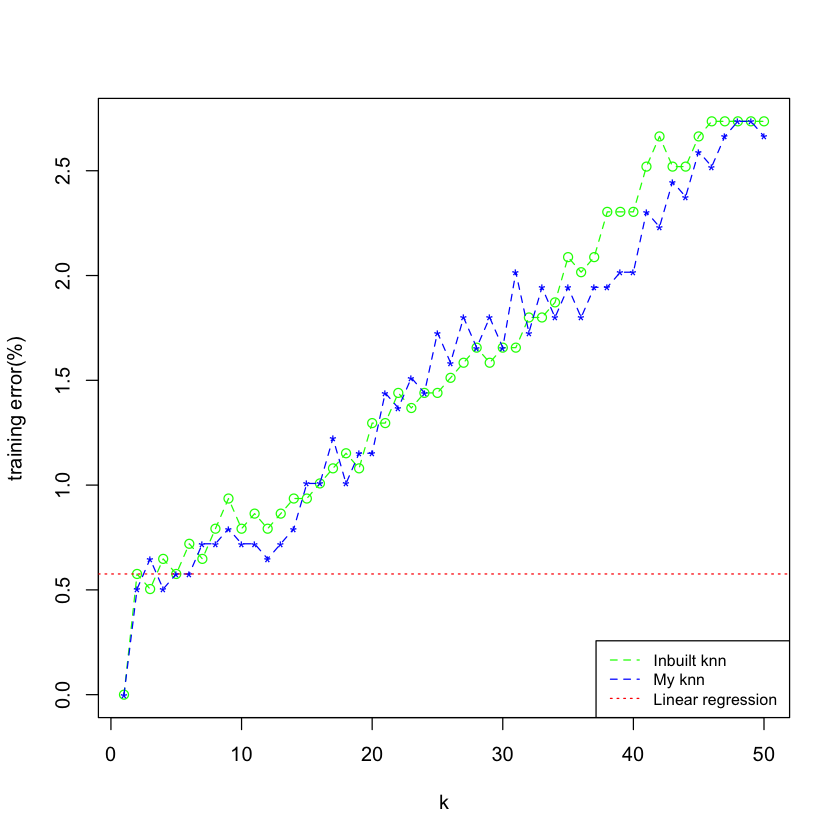

In [13]:
y.limit = c(min(c(errortrain.knn_own, errortrain.knn,errortrain.lr)), max(c(errortrain.knn_own, errortrain.knn,errortrain.lr)))
plot(k,errortrain.knn, type='o', lty = 2, ylim=y.limit, col="green", ylab="training error(%)")
points(k, errortrain.knn_own, type="o", lty=2, pch = "*", col="blue")
abline(h = errortrain.lr, col="red", lty = 3)
legend("bottomright", legend=c("Inbuilt knn", "My knn", "Linear regression"), col=c("green", "blue","red"), lty=c(2,2,3), cex=0.8)

As we can see, the $k$NN classifier produces less errorsome results on the testing dataset as compared to when we fit a linear model. Also, there's small result difference between my function and the inbuilt function, but the overall trend is the same. Additionally, my function performs much slower than the inbuilt function.